Step 1: Define Your Use Case
Before implementation, decide:

What type of data will be retrieved (documents, structured data, API results)?
What will the model generate? (answers, summaries, completions)
Where will the data be stored? (database, vector store, etc.)

In [2]:
import matplotlib.pyplot as plt

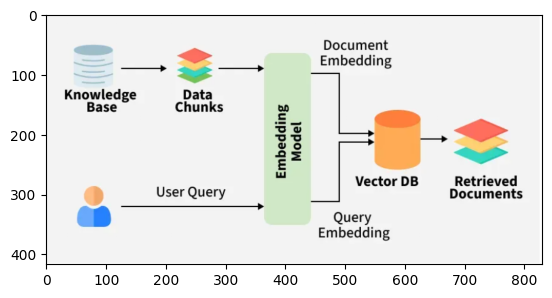

In [3]:
image = plt.imread("/content/Screenshot 2025-02-23 132203.png")

plt.imshow(image)

plt.show()


Step 2: Collect & Prepare the Knowledge Base
RAG works best with structured knowledge. Prepare:

PDFs, text documents, or web content

Database records (if needed)
Pre-processed embeddings for efficient retrieval
Tools:


---



[BeautifulSoup ](https://pypi.org/project/beautifulsoup4/) (for scraping)  

[PyMuPDF](https://pypi.org/project/PyMuPDF/) (for PDFs)

pandas (for structured data)

Step 3: Convert Text into Embeddings
Convert knowledge into numerical vectors using an embedding model like:


---


**OpenAI’s**  text-embedding-ada-002

**FAISS**  (for local storage)

**Hugging Face models**  (sentence-transformers)

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

text = "Retrieval-Augmented Generation (RAG) is an advanced natural language processing (NLP) technique that enhances text generation by integrating information retrieval with generative models.
 Instead of relying solely on pre-trained knowledge, a RAG system first retrieves relevant documents, facts, or passages from an external knowledge source, such as a database or a corpus of texts,
 and then uses this retrieved information to guide and improve the response generated by a large language model.
 This approach significantly enhances the accuracy, relevance, and factual consistency of the generated content, making it particularly useful for tasks that require up-to-date or domain-specific knowledge. By combining retrieval with generation, RAG addresses the limitations of traditional language models, which may struggle with outdated or incomplete knowledge, and provides more informative and context-aware responses."
embedding = model.encode(text)

Step 4: Store & Index Embeddings
Use a vector database to store embeddings:


---


FAISS (Fast & local)

ChromaDB (Lightweight)

Pinecone (Cloud-based)

Weaviate, Milvus (Scalable)

Example using FAISS:

In [ ]:
import faiss
import numpy as np

dimension = len(embedding)
index = faiss.IndexFlatL2(dimension)

index.add(np.array([embedding]))  # Add embeddings to index

Step 5: Implement a Retrieval System
When a query is received:


---


Convert the query into an embedding.

Find the closest stored embeddings.

Retrieve relevant documents.

Example query retrieval:



In [ ]:
query = "How does RAG work?"
query_embedding = model.encode(query)

D, I = index.search(np.array([query_embedding]), k=5)  # Retrieve top 5


Step 6: Feed Retrieved Context to a Generative Model

Pass retrieved results as context to a LLM (like GPT-4, Mistral, or LLaMA).

Example using OpenAI API:

In [ ]:
import openai

context = "RAG enhances LLMs by retrieving external knowledge..."
query = "Explain RAG in simple terms."

response = openai.ChatCompletion.create(
    model="gpt-4",
    messages=[
        {"role": "system", "content": "You are an AI assistant."},
        {"role": "user", "content": query},
        {"role": "assistant", "content": context}
    ]
)

print(response['choices'][0]['message']['content'])


Step 7: Deploy as an API or Web App
To serve RAG:

Use FastAPI for a backend API.

Integrate with React or Streamlit for a web interface.

Example API with FastAPI:

In [ ]:
from fastapi import FastAPI

app = FastAPI()

@app.post("/rag")
def get_rag_response(query: str):
    query_embedding = model.encode(query)
    D, I = index.search(np.array([query_embedding]), k=5)
    context = " ".join([retrieved_docs[i] for i in I[0]])

    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[{"role": "system", "content": "Use this context: " + context},
                  {"role": "user", "content": query}]
    )
    return {"response": response['choices'][0]['message']['content']}



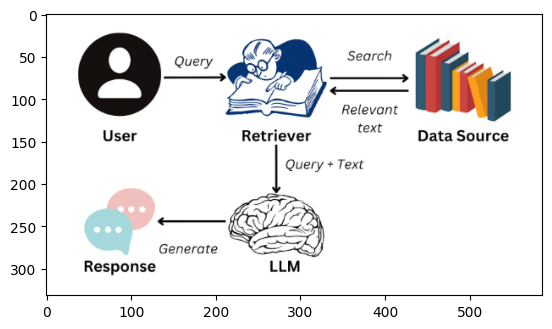

In [4]:
image = plt.imread("/content/Screenshot 2025-02-23 163742.png")

plt.imshow(image)

plt.show()


IN A SINGLE CODE


In [ ]:
import os
import openai
import faiss
import numpy as np
from fastapi import FastAPI
from sentence_transformers import SentenceTransformer

# Set your OpenAI API Key
openai.api_key = "your_openai_api_key"

# Initialize Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Directory containing text documents
DOCS_DIR = "doc_database"

# Load documents from files
def load_documents():
    documents = []
    filenames = []

    for file in os.listdir(DOCS_DIR):
        if file.endswith(".txt"):
            with open(os.path.join(DOCS_DIR, file), "r", encoding="utf-8") as f:
                content = f.read()
                documents.append(content)
                filenames.append(file)

    return documents, filenames

# Convert documents into embeddings and store in FAISS index
def create_faiss_index(documents):
    embeddings = model.encode(documents)
    dimension = embeddings.shape[1]
    index = faiss.IndexFlatL2(dimension)
    index.add(np.array(embeddings))
    return index, embeddings

# Retrieve top-k relevant documents
def retrieve_documents(query, index, documents, k=3):
    query_embedding = model.encode(query).reshape(1, -1)
    distances, indices = index.search(query_embedding, k)
    retrieved_docs = [documents[i] for i in indices[0] if i < len(documents)]
    return " ".join(retrieved_docs)

# Generate response using GPT model
def generate_response(query, context):
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "Use the provided context to answer the user query."},
            {"role": "user", "content": query},
            {"role": "assistant", "content": context}
        ]
    )
    return response['choices'][0]['message']['content']

# Initialize FastAPI app
app = FastAPI()

# Load data and create FAISS index
documents, filenames = load_documents()
index, _ = create_faiss_index(documents)

# Chatbot loop
@app.get("/chat")
def chat():
    print("RAG Chatbot is running! Type 'exit' to stop.")

    while True:
        query = input("\nYou: ")
        if query.lower() == "exit":
            print("Goodbye!")
            break

        context = retrieve_documents(query, index, documents)
        response = generate_response(query, context)
        print(f"\nChatbot: {response}")

if __name__ == "__main__":
    chat()



PDF CHATBOT

[https://huggingface.co/spaces/Likith79an/askpkd](https://huggingface.co/spaces/Likith79an/askpkd)



